<a href="https://colab.research.google.com/github/ANIRUDH9325/SMART-BRIDGE-INTERNSHIP-PROJECT/blob/main/ELECTRIC_MOTOR_TEMPERATURE_PROJECT_MAIN_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ELECTRIC MOTOR TEMPERATURE PREDICTION

In [40]:
#IMPORTING THE NECESSARY LIBRARIES

In [41]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

DATA COLLECTION

In [42]:
#uploading the dataset
motor_temp=pd.read_csv("/content/measures_v2.csv")

In [43]:
motor_temp

u_q    coolant  ...        torque  profile_id
0       -0.450682  18.805172  ...  1.871008e-01          17
1       -0.325737  18.818571  ...  2.454175e-01          17
2       -0.440864  18.828770  ...  1.766153e-01          17
3       -0.327026  18.835567  ...  2.383027e-01          17
4       -0.471150  18.857033  ...  2.081967e-01          17
...           ...        ...  ...           ...         ...
1330811 -2.152128  30.721298  ... -8.116730e-60          71
1330812 -2.258684  30.721306  ... -5.815891e-60          71
1330813 -2.130312  30.721312  ... -4.167268e-60          71
1330814 -2.268498  30.721316  ... -2.985978e-60          71
1330815 -2.100158  30.721319  ... -2.139547e-60          71

[1330816 rows x 13 columns]

In [44]:
motor_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


In [45]:
# we do not have any null values so data is cleaned and completed

In [52]:
def preprocess_inputs(df):
    df = df.copy()

    # Drop profile_id column
    df = df.drop('profile_id', axis=1)

    # Split df into X and y
    y = df['pm'].copy()
    X = df.drop('pm', axis=1).copy()

    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X, y

PREPROCESSING


In [56]:
x,y=preprocess_inputs(motor_temp)

In [62]:
x

u_q   coolant  stator_winding  ...  stator_yoke   ambient    torque
0       -1.238979 -0.799812       -1.648158  ...    -1.494244 -2.443386 -0.400838
1       -1.236150 -0.799197       -1.647959  ...    -1.494323 -2.443396 -0.400082
2       -1.238757 -0.798729       -1.648064  ...    -1.493755 -2.443404 -0.400974
3       -1.236180 -0.798417       -1.648285  ...    -1.493529 -2.443409 -0.400174
4       -1.239442 -0.797432       -1.648303  ...    -1.493738 -2.443413 -0.400565
...           ...       ...             ...  ...          ...       ...       ...
1330811 -1.277497 -0.252853       -0.734801  ...    -0.476927 -0.298612 -0.403264
1330812 -1.279909 -0.252853       -0.736038  ...    -0.476796 -0.308136 -0.403264
1330813 -1.277003 -0.252853       -0.736995  ...    -0.477067 -0.304750 -0.403264
1330814 -1.280131 -0.252852       -0.737626  ...    -0.476829 -0.292215 -0.403264
1330815 -1.276320 -0.252852       -0.739760  ...    -0.476594 -0.278688 -0.403264

[1330816 rows x 11 columns]

In [58]:
y

0          24.554214
1          24.538078
2          24.544693
3          24.554018
4          24.565397
             ...    
1330811    62.147780
1330812    62.142646
1330813    62.138387
1330814    62.133422
1330815    62.131429
Name: pm, Length: 1330816, dtype: float64

EXPLORATORY DATA ANALYSIS


In [ ]:
eda_df=pd.concat([x,y],axis=1).copy()

UNIVARIATE ANALYSIS

In [ ]:
eda_df.describe()

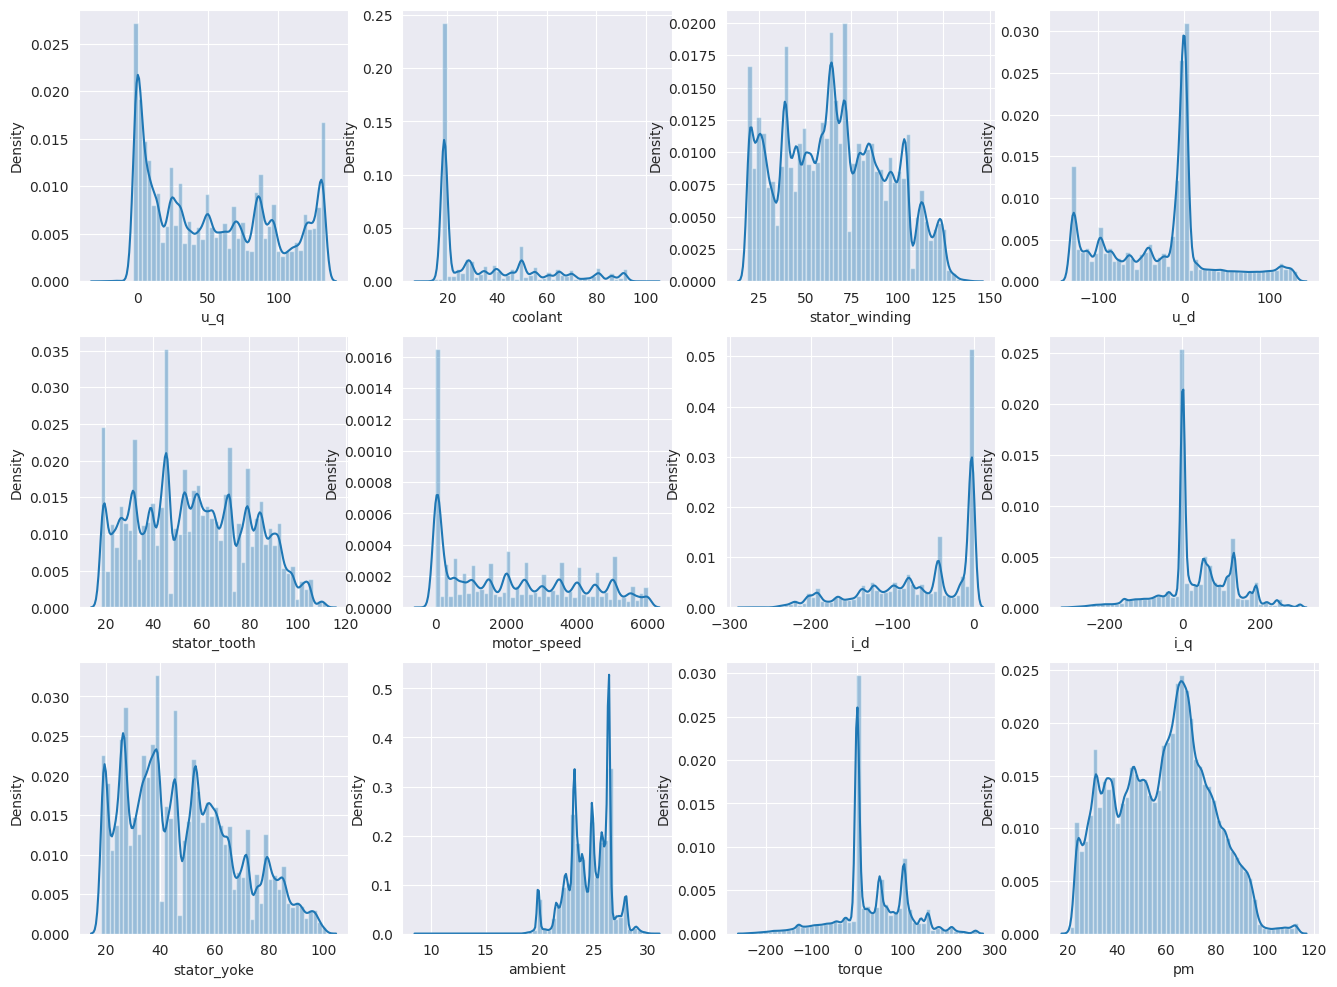

In [54]:
plt.figure(figsize=(16, 12))
for i in range(len(eda_df.columns)):
    plt.subplot(3, 4, i + 1)
    sns.distplot(eda_df[eda_df.columns[i]])
plt.show()

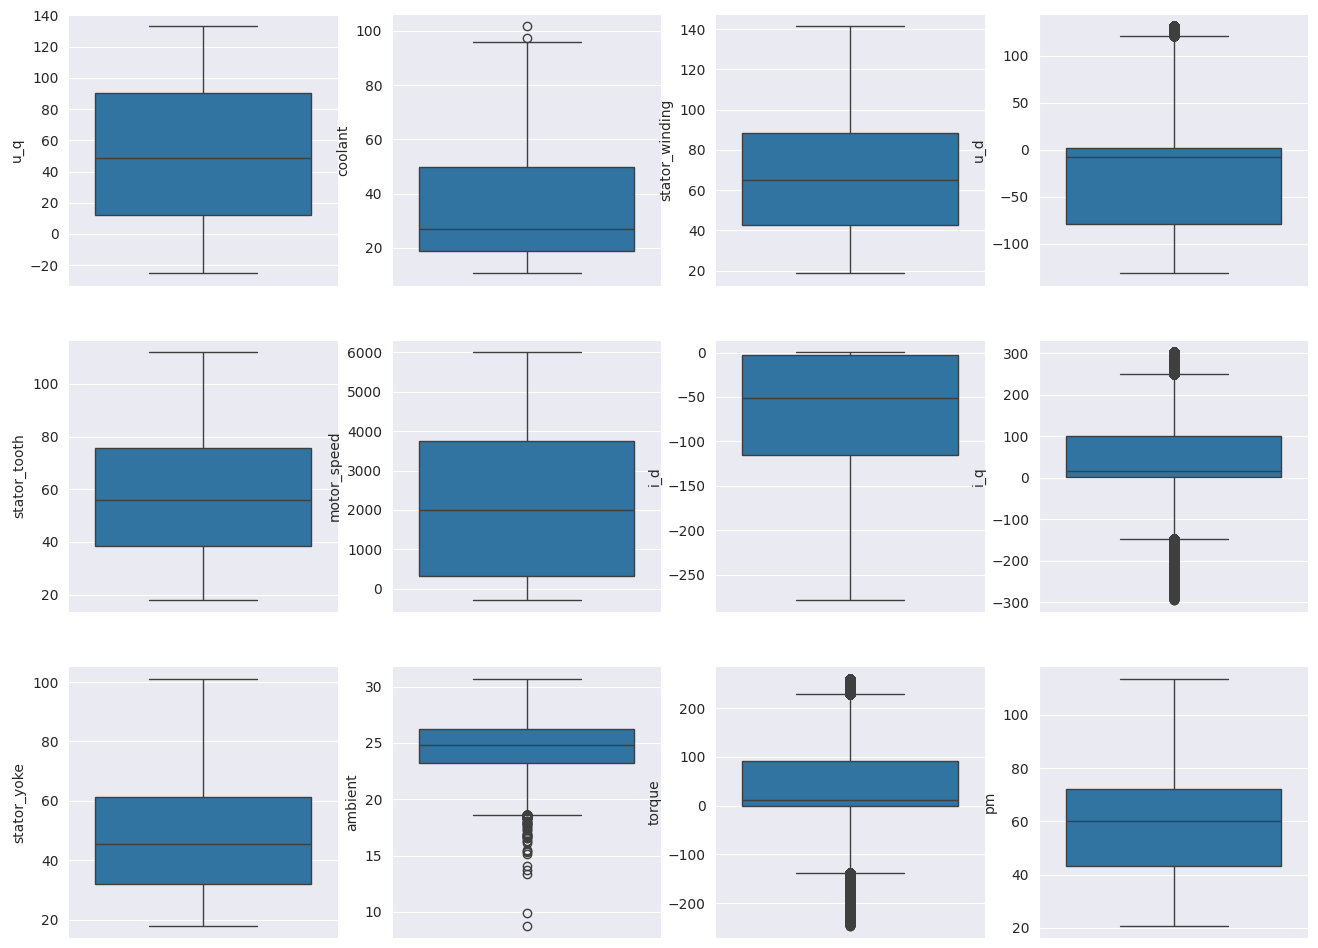

In [39]:
plt.figure(figsize=(16, 12))#BOX PLOT REPRESENTATION
for i in range(len(eda_df.columns)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])
plt.show()

Multivariate Analysis

<Figure size 1600x1600 with 0 Axes>

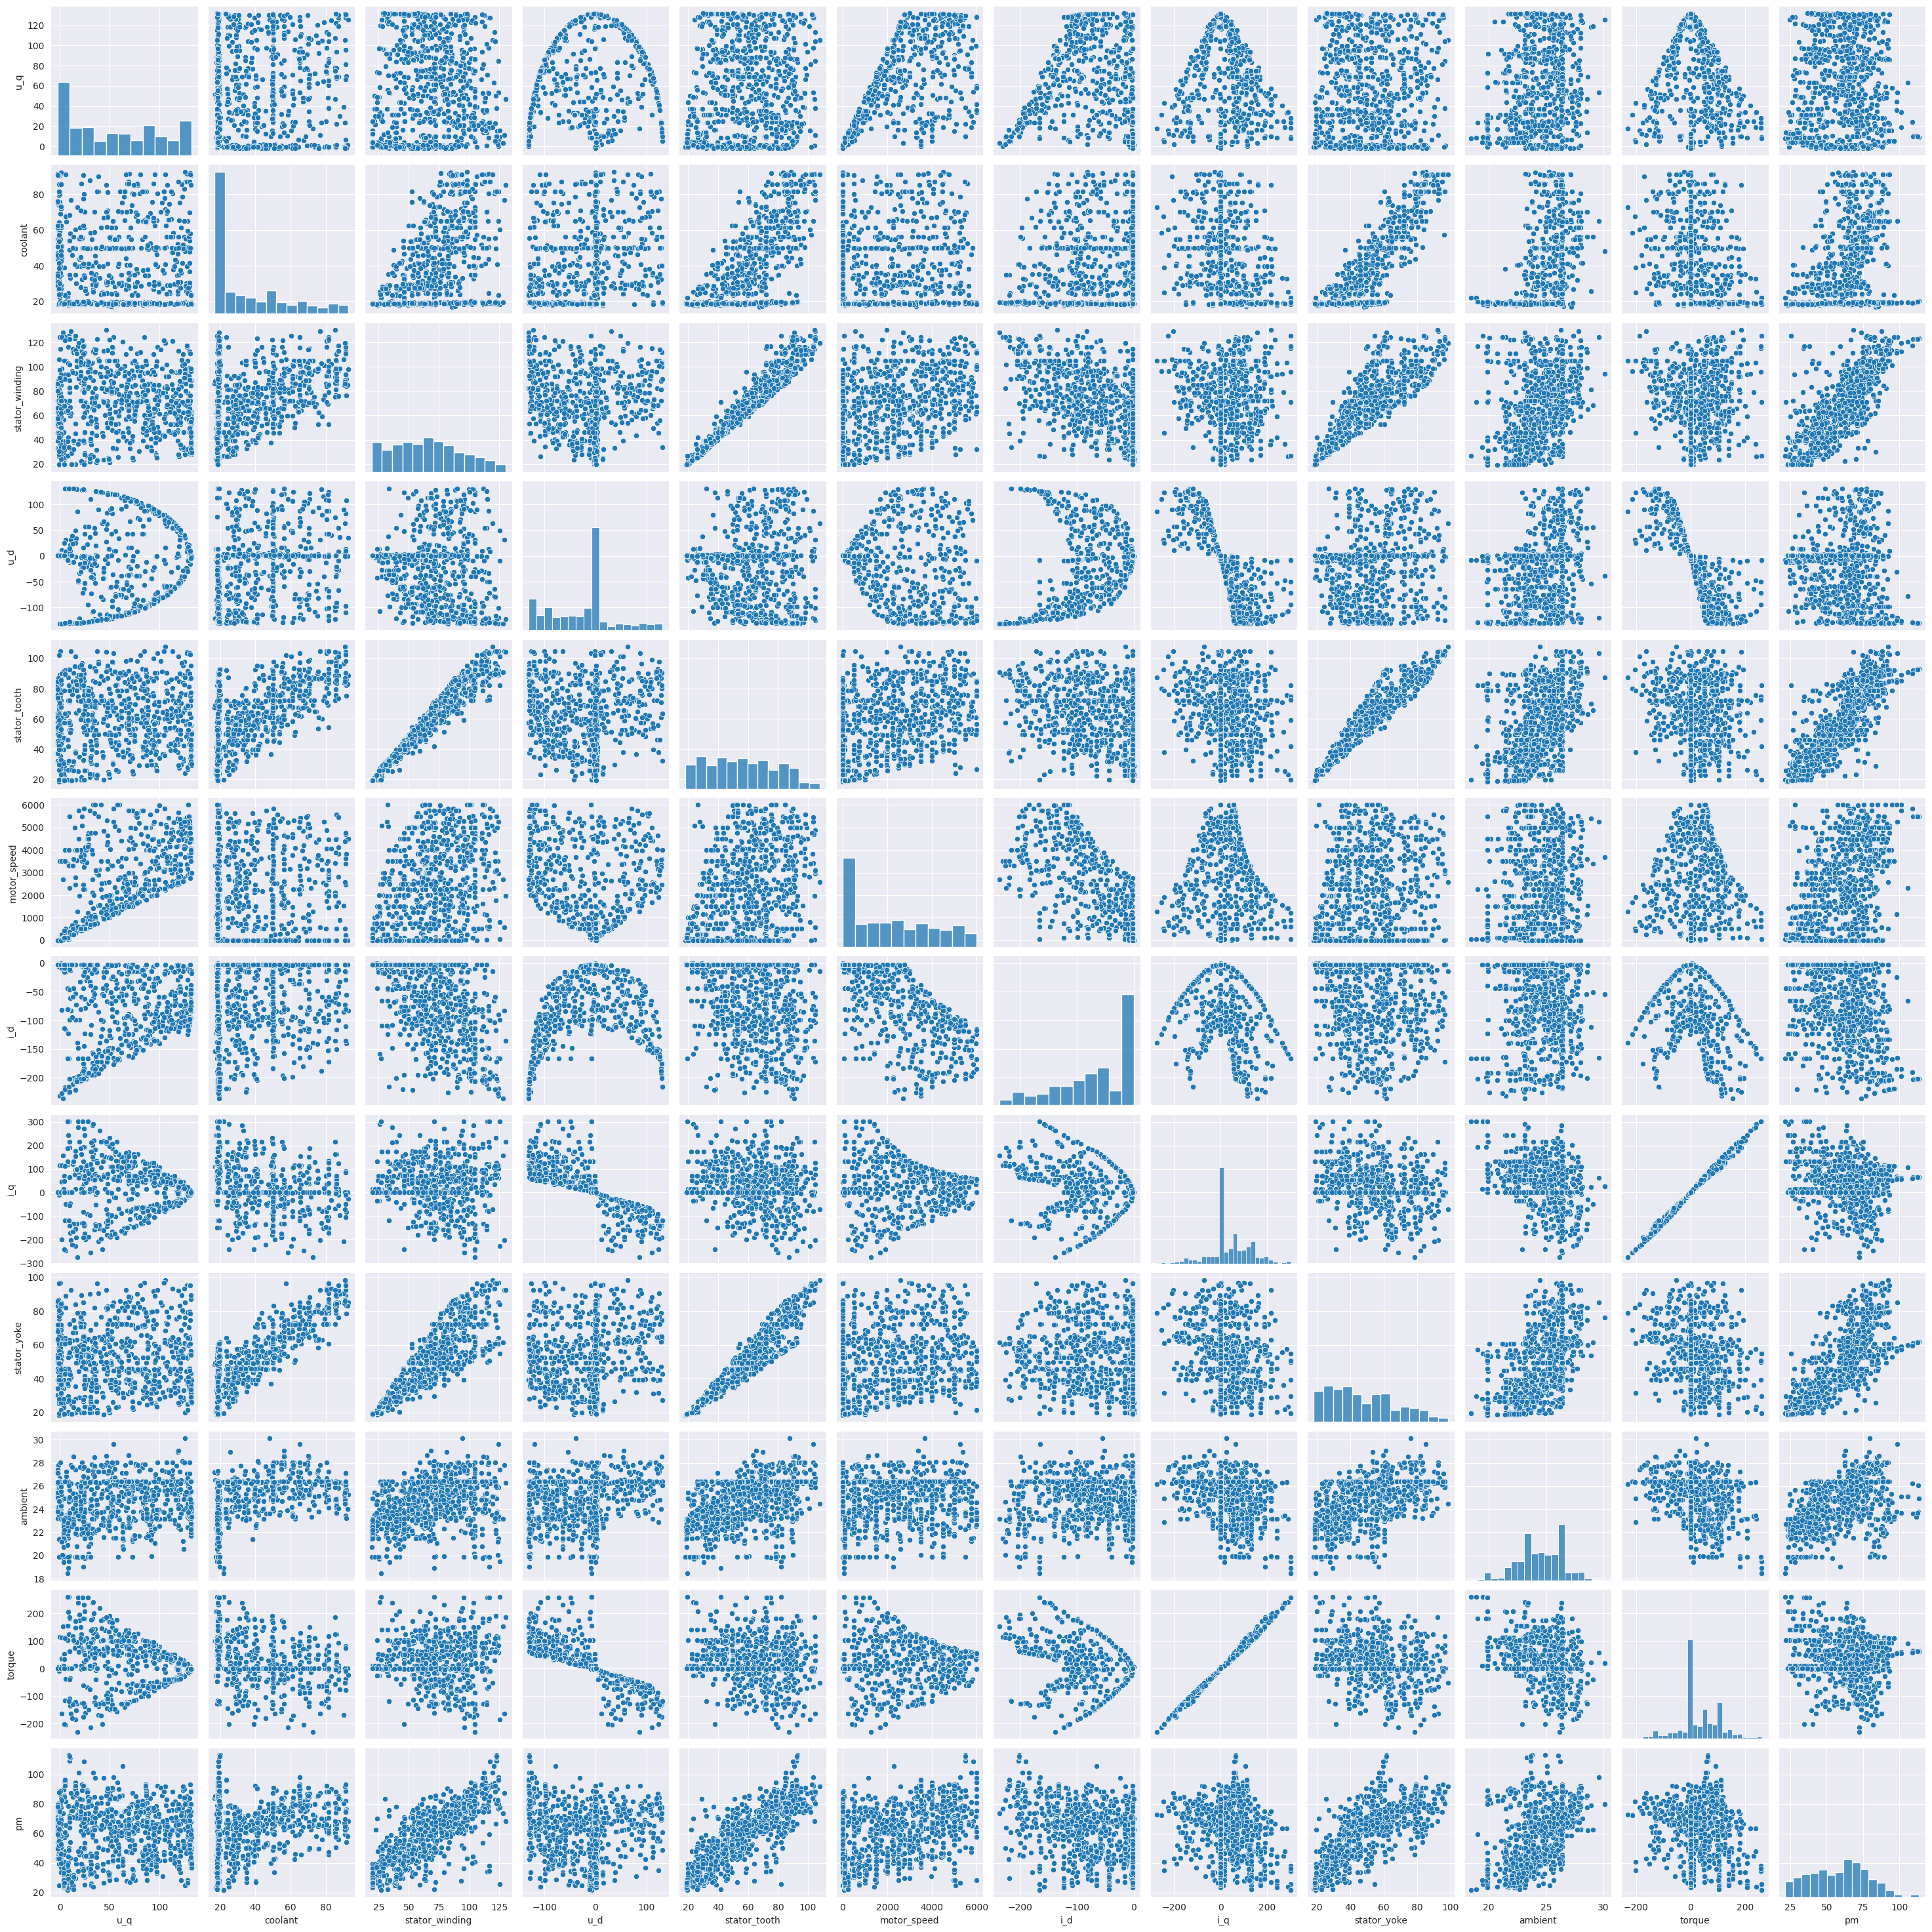

In [59]:
plt.figure(figsize=(16, 16))
sns.pairplot(eda_df.sample(1000))
plt.show()

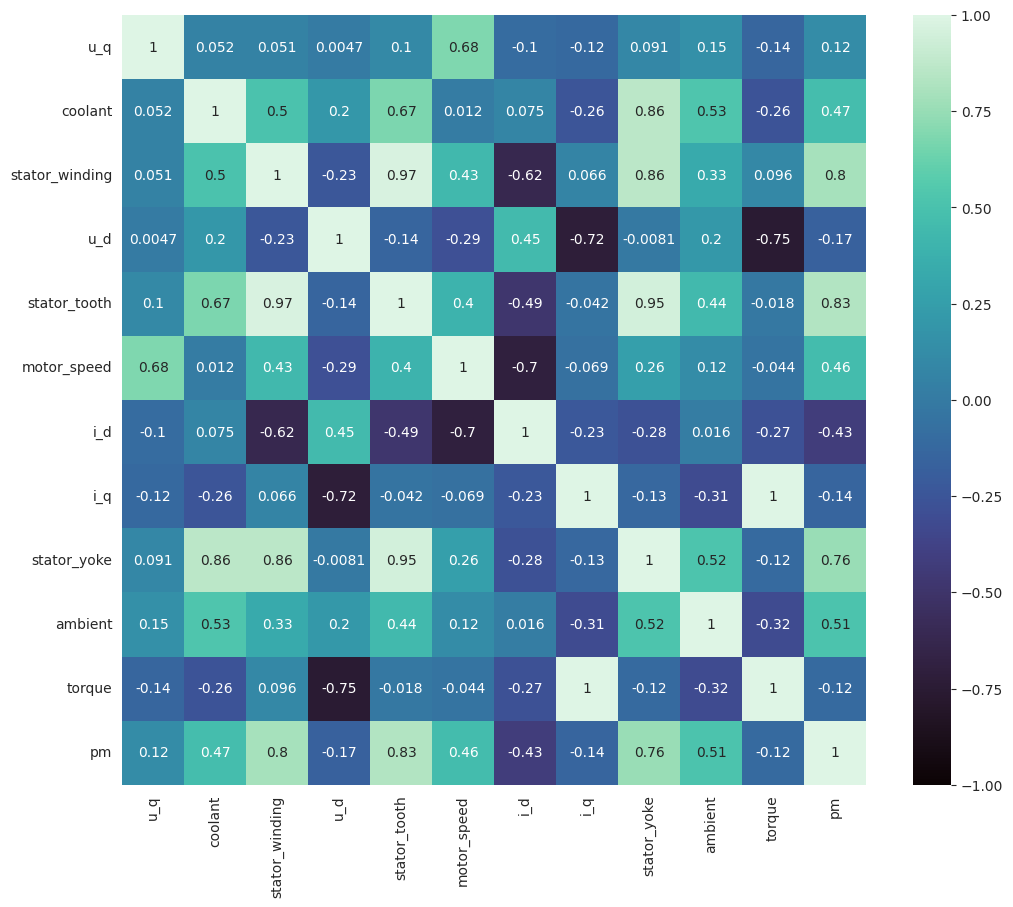

In [60]:
corr = eda_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

#TRAINING

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=123)

In [66]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [67]:
LinearRegression()

LinearRegression()

In [69]:
print("Model R^2 Score: {:.4f}".format(model.score(x_test, y_test)))

Model R^2 Score: 0.8553


In [71]:
print("Model R^2 Score: {:.4f}".format(model.score(x_test, y_test)))

Model R^2 Score: 0.8553
